# TEST FONCTION POUR LE CHEMIN

In [251]:
import numpy as np
from scipy import signal
from scipy import interpolate
from PIL import Image
import matplotlib.pyplot as plt
import numpy.linalg as npl
import os
from scipy.misc import imresize
from sklearn.neighbors import KNeighborsClassifier as Knc
from sklearn.cross_validation import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical
import skimage.transform as skt
from keras.applications.vgg16 import VGG16, preprocess_input

In [2]:
liste_noms = os.listdir("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
liste_chemins=[]
for name in liste_noms:
    if name[-4:] == '.jpg':
        print(name)
        liste_chemins+=["/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/"+name]
        plt.imshow(plt.imread(liste_chemins[-1]))
        plt.show()
    else:
        pass
    

In [3]:
def Contenu_Dossier(path_dossier):
    
    path=path_dossier

    liste_noms = os.listdir(path_dossier)
    liste_chemins=[]
    for name in liste_noms:
        if name[-4]!='.':
            liste_chemins2=Contenu_Dossier(path_dossier+'/'+name)
            liste_chemins+=liste_chemins2
        if name[-4:] == '.jpg':
            liste_chemins+=[path_dossier+"/"+name]
        else:
            pass
        
    return liste_chemins
    

['/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_192.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_099.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_111.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_018.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_035.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_147.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_052.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_164.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_181.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_088.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_100.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_007.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_119.jpg', '/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring/ring_0

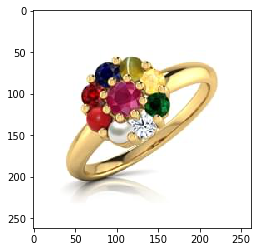

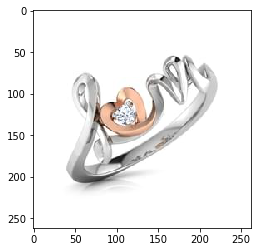

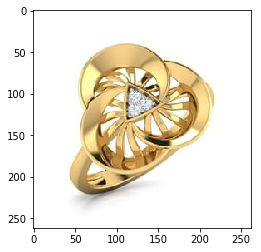

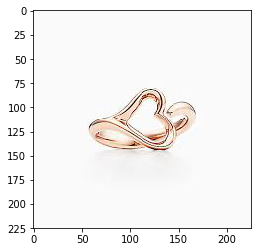

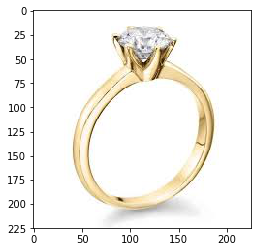

In [4]:
l_chemins = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")

print(l_chemins)
for i in range(5):
    plt.imshow(plt.imread(l_chemins[i]))
    plt.show()


In [7]:
import scipy
tab=scipy.misc.imread(l_chemins[0])


/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [8]:
type(tab)

numpy.ndarray

In [9]:
tab.shape

(262, 262, 3)

In [10]:
262*262*3

205932

In [11]:
tab.max()

255

In [12]:
len(l_chemins)

1270

# KNN with mnist

In [13]:
from sklearn import datasets
mnist = datasets.load_digits()

In [14]:
Knc??

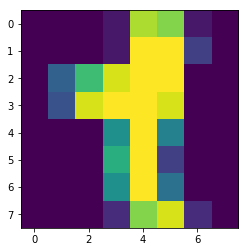

In [15]:
plt.imshow(mnist['images'][80])

In [14]:
knn=Knc()

In [15]:
from sklearn.cross_validation import train_test_split

In [16]:
X=mnist['data']
y=mnist['target']

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,y)
print(X_train)

[[ 0.  5. 15. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  2. ...  5.  0.  0.]
 ...
 [ 0.  0.  6. ...  4.  0.  0.]
 [ 0.  1. 14. ...  5.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]]


In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn.score(X_test, y_test)

0.9888888888888889

In [20]:
knn.kneighbors([X[80]])

(array([[ 0.        , 19.05255888, 19.4422221 , 20.34698995, 20.63976744]]),
 array([[1314,  541,  105,  285,  710]]))

TypeError: Invalid dimensions for image data

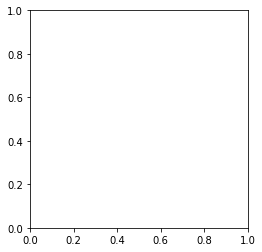

In [21]:
plt.imshow(mnist['images'])

In [16]:
for i in knn.kneighbors([X[80]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X_train[i], (8,8)))

NameError: name 'knn' is not defined

## Application au jeu de données

In [17]:
l_chemins_bagues = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/ring")
l_chemins_bijoux = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
l_chemins_bracelets = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery/bracelet")

In [18]:
def knn_homemade_faux(data, nb_voisins, bijoux, autre, indice = 0):
    
    n = len(data)
    tab = np.zeros(n)
    
    if autre : 
        indice = 0
    
    
    mind = 10000
    min_ind = indice
    
    for i in range(n):
        
        tab[i] = npl.norm(data[i] - data[indice], 2)
    
    indice_ord = np.argsort(tab)
    
    
    knn = np.zeros((2,nb_voisins + 1))
    knn[0,0] = int(indice)
    knn[1,0] = tab[indice]
    
    for k in range(nb_voisins):
        knn[0,k+1] = int(indice_ord[k+1])
        knn[1,k+1] = tab[indice_ord[k+1]]
    
    
    
    
    return knn

In [19]:
print(np.ravel(plt.imread(l_chemins_bagues[0])))
print(type(np.ravel(plt.imread(l_chemins_bagues[0]))))

[255 255 255 ... 255 255 255]
<class 'numpy.ndarray'>


In [135]:
donnees=[]
cible=[]

for i in range(len(l_chemins_bracelets)) :
    #print((plt.imread(l_chemins_bracelets[i])).shape)
    donnees.append(np.ravel(plt.imread(l_chemins_bracelets[i])))
    cible+=[0]

for i in range(len(l_chemins_bagues)) :
    
    donnees.append(np.ravel(imresize((plt.imread(l_chemins_bagues[i])), (262,262,3))))
    cible+=[1]
    
    
#print('données',donnees)
    
bijoux={'data': donnees, 'target':cible}

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [136]:
bijoux2=[]




for i in range(len(l_chemins_bijoux)) :
    bijoux2.append(np.ravel(imresize((plt.imread(l_chemins_bijoux[i])), (262,262,3))))

cible2=np.zeros(len(bijoux2))
bijoux3={'data': bijoux2, 'target':cible2}

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


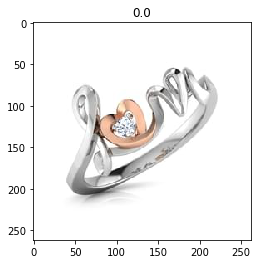

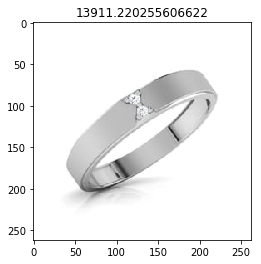

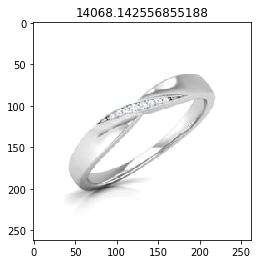

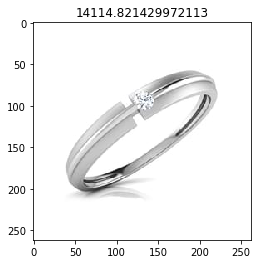

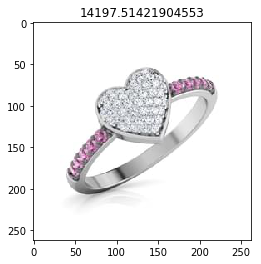

In [146]:
knn_bijoux2=Knc()
X=np.array(bijoux3['data'])
y=bijoux3['target']
knn_bijoux2.fit(X, y)

k=1
ind=0
for i in knn_bijoux2.kneighbors([X[k]])[1][0]:
    plt.figure()
    plt.imshow(np.reshape(X[i], (262,262,3)))
    plt.title(knn_bijoux2.kneighbors([X[k]])[0][0][ind])
    ind+=1


In [24]:
print(X[k].shape)

(205932,)


In [25]:
X=np.array(bijoux['data'])
y=bijoux['target']
print(X)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [141]:
X_train, X_test, y_train, y_test= train_test_split(np.array(X),np.array(y))
type(X_train)

numpy.ndarray

In [142]:

knn_bijoux2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[434 363 822 487 294]


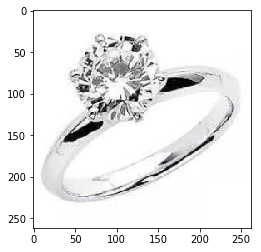

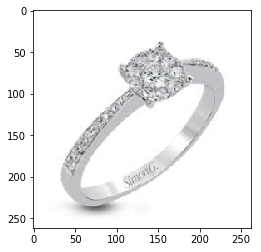

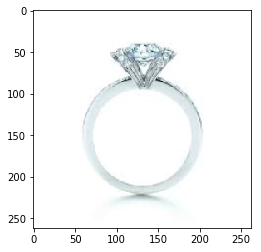

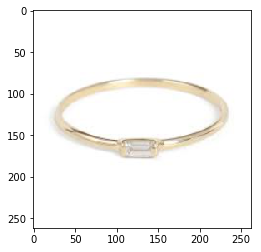

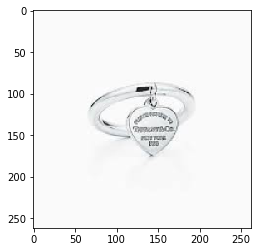

In [143]:
k=100
print(knn_bijoux2.kneighbors([X[k]])[1][0])
for i in knn_bijoux2.kneighbors([X[k]])[1][0]:
    plt.figure()
    #plt.imshow(plt.imread(l_chemins[i]))
    plt.imshow(np.reshape(X_train[i], (262,262,3)))


In [29]:
from scipy.misc import imresize

In [30]:
(plt.imread(l_chemins_bagues[1])).shape

(262, 262, 3)

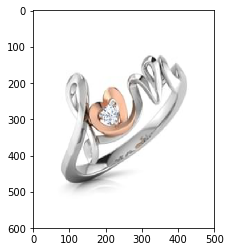

In [31]:
plt.imshow(skt.resize((plt.imread(l_chemins_bagues[1])), (600,500,3), mode = 'reflect'))

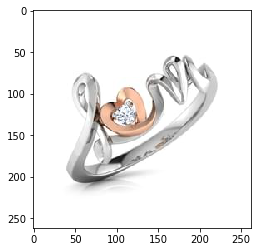

In [32]:
plt.imshow((plt.imread(l_chemins_bagues[1])))

In [33]:
comp = skt.resize((plt.imread(l_chemins_bagues[1])), (60,60,3), mode = 'reflect')

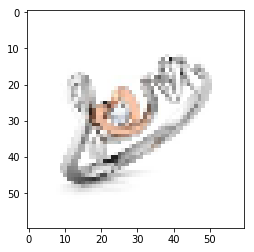

In [34]:
plt.imshow(comp)

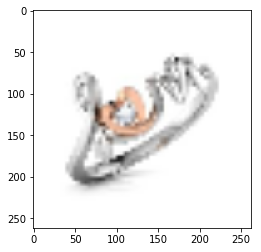

In [35]:
plt.imshow(skt.resize(comp, (262,262,3), mode = 'reflect'))

# Test réseau de neurones sur mnist

In [36]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [37]:
train_images.shape

(60000, 28, 28)

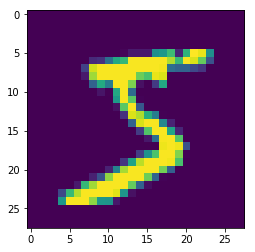

In [38]:
plt.imshow(train_images[0])

In [39]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


In [40]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [42]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 46s 767us/step - loss: 0.2552 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1036 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0686 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0491 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0368 - acc: 0.9889


In [46]:
test = np.expand_dims(train_images[0], 0)

In [47]:
probas = network.predict(test)

In [48]:
np.argmax(probas, 1)[0]

5

In [49]:
28*28

784

In [50]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [51]:
network.layers[-1].output

<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>

In [52]:
from keras.models import Model

# Passage aux bijoux

In [53]:
network2 = models.Sequential()
network2.add(layers.Dense(512, activation='relu', input_shape=(262 * 262 * 3,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



In [54]:
len_bijoux = len(bijoux2)
taille_train = 500

train_bijoux = np.array(bijoux2[:taille_train]).reshape((taille_train, 262 * 262 * 3))
train_bijoux = train_bijoux.astype('float32') / 255

test_bijoux = np.array(bijoux2[taille_train:]).reshape((len_bijoux-taille_train, 262 * 262 * 3))
test_bijoux = test_bijoux.astype('float32') / 255

In [55]:


network.fit(train_bijoux, train_labels, epochs=5, batch_size=128)

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (205932,)

In [56]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


In [57]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    
        horizontal_flip=True)
type(train_datagen)

keras_preprocessing.image.ImageDataGenerator

In [58]:
#train_generator = datagen.flow_from_directory(
#        "/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery",
#        target_size=(262,262,3),
#        batch_size=32,
#        class_mode='binary')

#validation_generator = datagen.flow_from_directory(
#        'data/validation',
#        target_size=(150, 150),
#        batch_size=32,
#        class_mode='binary')

In [59]:
#network2.fit_generator(
#        train_generator,
#        steps_per_epoch=2000,
#        epochs=50,
#        validation_data=validation_generator,
#        validation_steps=800)

# Réseau pré entrainé

In [60]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input


In [61]:
model = VGG16(include_top=False, weights='imagenet')

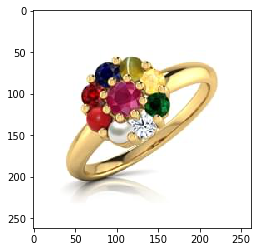

In [62]:
image = plt.imread(l_chemins[0])
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


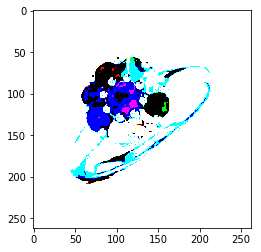

In [63]:
plt.imshow(preprocess_input(image))

In [64]:
image.shape

(262, 262, 3)

In [65]:
np.expand_dims(image, axis=0).shape

(1, 262, 262, 3)

In [66]:
features = model.predict(np.expand_dims(image, axis=0))

In [67]:
features.ravel()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [68]:
262*262*3

205932

In [244]:
model = VGG16(include_top=False, weights='imagenet')
l_chemins = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")

In [103]:
def knn_homemade(data, nb_voisins, bijoux, autre, indice):
    
    n = len(data)
    tab = np.zeros(n) + 100
    
    if autre : 
        indice = 0

    
    for i in range(n):
        
        tab[i] = npl.norm(data[i] - data[indice], 2)
    
    plt.show()
    
    indice_ord = np.argsort(tab)
    
    
    knn = np.zeros((2,nb_voisins + 1))
    knn[0,0] = int(indice)
    knn[1,0] = tab[indice]
    
    print(indice_ord)
    print(tab[20])
    
    for k in range(nb_voisins):
        knn[0,k+1] = int(indice_ord[k+1])
        knn[1,k+1] = tab[indice_ord[k+1]]
    
    print(tab[indice_ord])
    return knn

In [96]:
def Features1 (data, bijoux, autre): #qui marche pas trop
    n=len(data)
    param=[]
    if autre :
        image = np.expand_dims(preprocess_input(skt.resize(plt.imread(bijoux),(262,262,3), mode = 'reflect')),axis=0)
        param += [model.predict(image).ravel()]
    
    for i in range(n):
        image = np.expand_dims(preprocess_input(skt.resize(plt.imread(data[i]),(262,262,3), mode = 'reflect')),axis=0)
        param += [model.predict(image).ravel()]
    return param

In [227]:
def compute_features(data):
    n=len(data)
    features=np.zeros((n,32768))
    
    for i in range(n):
        image = np.expand_dims(preprocess_input(skt.resize(plt.imread(data[i]),(262,262,3), mode = 'reflect')),axis=0)
        features[i,:] = model.predict(image).ravel()
    return features

In [245]:
features=compute_features(l_chemins)

In [246]:
features.shape

(1270, 32768)

In [206]:
def Voisins (data, indice, k, distance):
    n = len(data)
    cible = np.zeros(n)
    data_knn = Knc(k, metric=distance)
    data_knn.fit(data, cible)
    return data_knn.kneighbors(data[indice].reshape(1, -1))

In [207]:
features[k].reshape(1, -1).shape

(1, 32768)

In [249]:
voisins=Voisins(features, 0,6, "euclidean")

In [211]:
from sklearn.metrics.pairwise import cosine_similarity

In [242]:
voisins[1][0]

array([  6,  83, 266, 179, 293])

In [230]:
distance = cosine_similarity(features, features)

In [231]:
distance.shape

(301, 301)

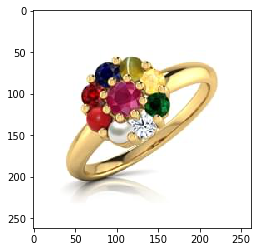

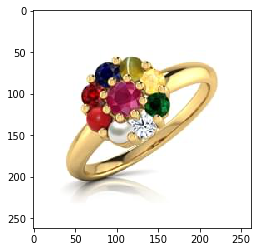

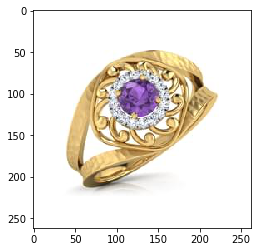

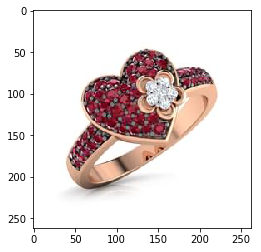

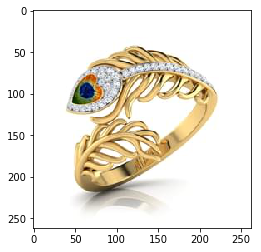

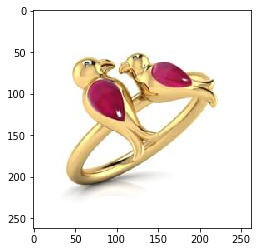

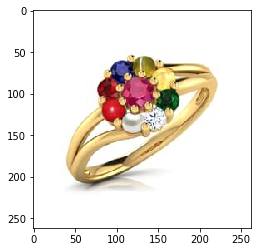

In [250]:
indice = 0

#voisins = distance[indice].argsort()[-5:-1]
plt.figure()
plt.imshow(plt.imread(l_chemins[indice]))
plt.show()
for i in voisins[1][0]:
    plt.figure()
    plt.imshow(plt.imread(l_chemins[i]))
    plt.show()

In [76]:
def Affichage (nb_voisins, kvoisins, X_train, data):
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()
show()
    
    
    
    
    ind = 0
    for i in (kvoisins[1][0]):
        if ind == 0:
            plt.figure()
            plt.imshow(plt.imread(data[i]))
            plt.title(kvoisins[0][0][ind])
            plt.show()
        else :
            plt.subplot(1, nb_voisins - 1, ind)
            #pyplot.gcf().subplots_adjust(left = 0.3, bottom = 0.3, right = 0.7, top = 0.7, wspace = 0, hspace = 2)
            plt.imshow(plt.imread(data[i]))
            plt.title(kvoisins[0][0][ind])
        ind += 1
    plt.show()

IndentationError: unexpected indent (<ipython-input-76-4b8fb56ed5e7>, line 18)

In [77]:
l_chemins = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery")
im_modifiees = Features(l_chemins)
kvoisins, X_train = Voisins(im_modifiees, 180, 5)

for ind in range(3):
    plt.imshow(plt.imread(l_chemins[ind]))
    plt.show()

TypeError: Features() missing 2 required positional arguments: 'bijoux' and 'autre'

In [78]:
for ind in range(3) :
    print(kvoisins[0][0][ind])

NameError: name 'kvoisins' is not defined

In [79]:
for ind in range(3) :
    print(im_modifiees[ind])

NameError: name 'im_modifiees' is not defined

In [195]:
def Affichag_Guepard (k, nb_voisins, kvoisins, data):
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(data[k]))
    plt.title(kvoisins[0][0])
    plt.show()
    
    # Affichage des autres au-dessous
    fig, axes = plt.subplots(1, nb_voisins - 1, figsize = (15,5))
    
    for ind, ax in enumerate(axes) :
        ax.imshow(plt.imread(data[kvoisins[1][0][ind+1]]))
        ax.set_title(str(kvoisins[0][0][ind+1]))
        
    fig.tight_layout()
    plt.show()

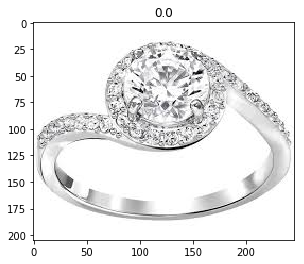

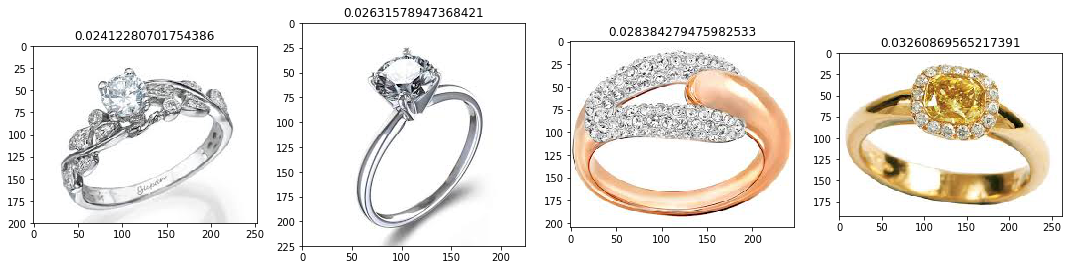

In [209]:
Affichag_Guepard(120, 5, voisins, l_chemins)

In [86]:
def affichage_homemade (nb_voisins, kvoisins, data, bijoux):
    
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(bijoux))
    #plt.imshow(plt.imread(data[int(kvoisins[0,0])]))
    plt.title(kvoisins[1,0])
    plt.show()
    
    
     # Affichage des autres au-dessous
    fig, axes = plt.subplots(1, nb_voisins, figsize = (15,5))
    
    for ind, ax in enumerate(axes) :
        ax.imshow(plt.imread(data[int(kvoisins[0,ind+1])]))
        ax.set_title(str(kvoisins[1,ind+1]))
        
    fig.tight_layout()
    plt.show()

In [57]:
print(kvoisins[0,1])

123.0


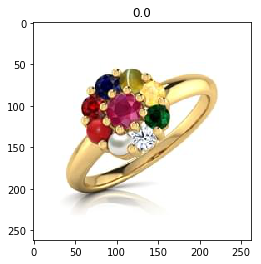

0
1
2
3
4


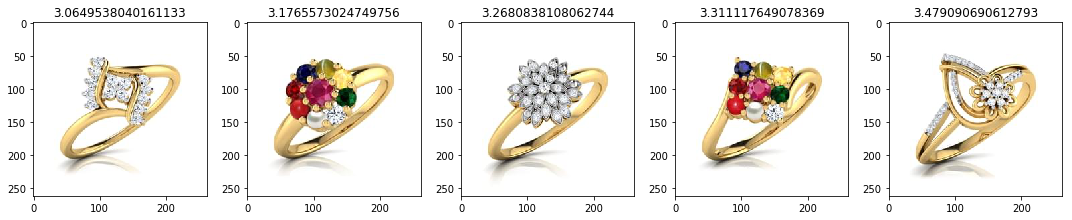

In [58]:
affichage_homemade(0,5,kvoisins, l_chemins)

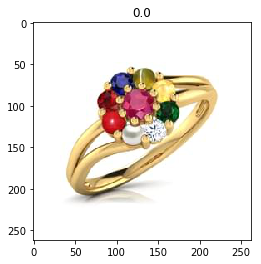

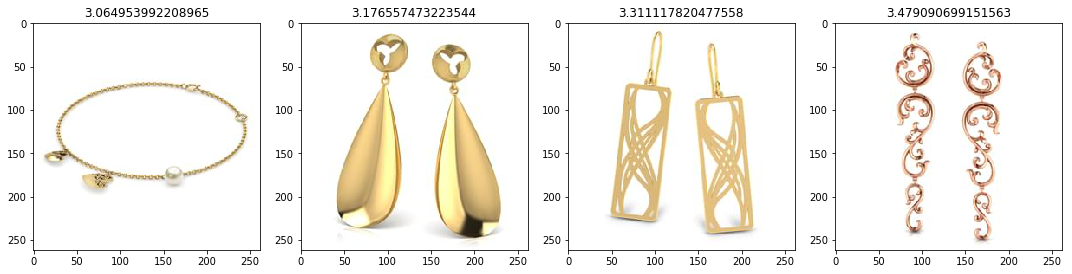

In [29]:
Affichag_Guepard (180, 5,kvoisins, X_train, l_chemins)

In [ ]:
Affichag_Guepard(25, 5,kvoisins, X_train, l_chemins)

In [128]:
def Fonction_finale1 (k, nb_voisins, nom=""):
    model = VGG16(include_top=False, weights='imagenet')
    data = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery"+nom)
    im_modifiees = Features(data, data[k], False)
    kvoisins = knn_homemade(im_modifiees, nb_voisins, data[k], False, k)
    affichage_homemade(nb_voisins, kvoisins, data, data[k])
    
    
    
def Fonction_finale (k, nb_voisins, autre, noms_possibles, nom=""):
    if autre == False :
        data = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery"+nom)
        bijoux = data[k]

    else :
        data = []
        for i in noms_possibles:
            if i != nom:
                data += Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery"+i)
            
            if nom == "":
                del data[k]
                
        bijoux = Contenu_Dossier("/home/bichet/Bureau/4A/Projet_RecomStyle/Jewellery"+nom)[k]
            
    im_modifiees = Features(data, bijoux, autre)
    kvoisins = knn_homemade(im_modifiees, nb_voisins, bijoux, autre, k)
    affichage_homemade(nb_voisins, kvoisins, data, bijoux)

In [129]:
noms_possibles=["/ring", "/bracelet", "/necklace", "/earring"]

boucle1
[100 113  88 ... 150 963  22]
14.385641098022461
[  0.          11.84481049  12.8212719  ...  28.72777367  34.477314
 169.47264099]


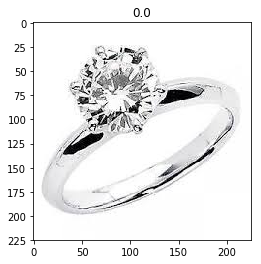

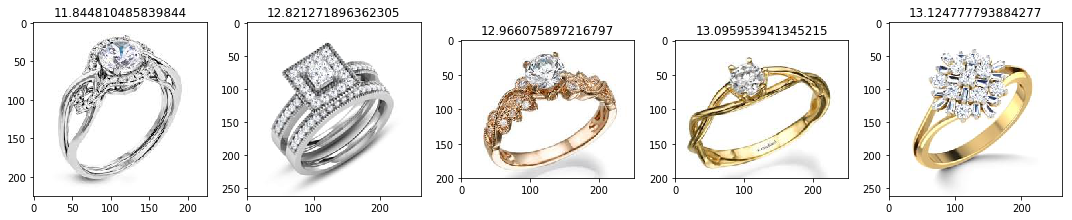

In [151]:
Fonction_finale (100, 5, False, noms_possibles, "")

[ 19 142  57 ... 150 963  22]
5.4745588302612305
[  0.           1.14220011   1.45481884 ...  28.70638275  34.46635056
 170.89099121]


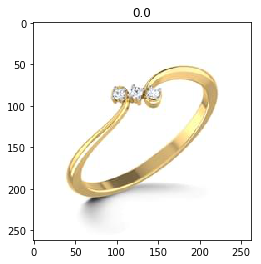

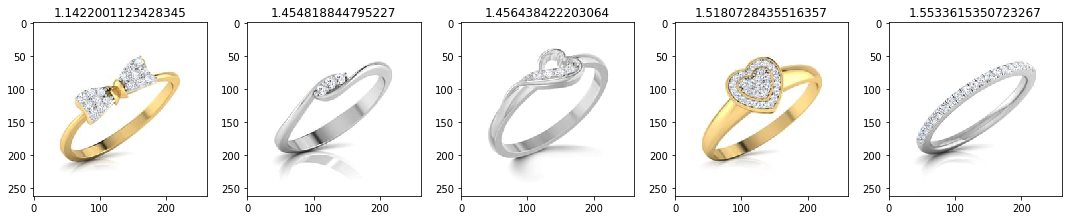

In [124]:
Fonction_finale1(19, 5, "")

* faire le knn jusqu'au bout
* une image et 5 recos sur une dizaine d'images
* ex bagues qui ressemblent aux autres bagues 
* une image et 5 recos sur une dizaine d'images
* ex tout sauf bagues qui ressemblent aux autres bagues 
* tester plusieurs distances

In [1]:
def affichage_cosine(indice, k, distance, voisins, chemins):
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(chemins[indice]))
    plt.title("similarité : " + str(distance[0]))
    plt.show()
    
    # Affichage des autres au-dessous
    lines = k//4
    fig, axes = plt.subplots(lines , 4, figsize = (10*lines,5*lines))
    #if lines == 1:
        #axes = axes.reshape(1,-1)
    num = 1
    
    for i, axline in enumerate(axes):
        print(axes[0])
        for ind, axcol in enumerate(axes[i]) :
            axcol.imshow(plt.imread(chemins[voisins[num]]))
            axcol.set_title("similarité : " + str(distance[num]))
            num += 1
        
    fig.tight_layout()
    plt.show()
    
    # Affichage de la dernière ligne
    fig_der, ax_der = plt.subplots(1, k%4, figsize=(10,5))
    
    for ind, ax in enumerate(ax_der) :
        ax.imshow(plt.imread(chemins[voisins[num]]))
        ax.set_title("similarité : " + str(distance[num]))
        num += 1
    

    fig_der.tight_layout()
    plt.show()

In [2]:
#fonction utile si on utilise la fonction knn
def affichage_voisins(data, indice, k, voisins):
    # Affichage en gros de l'image principale
    plt.figure()
    plt.imshow(plt.imread(data[indice]))
    plt.title("distance : " + str(voisins[0][0][0]))
    plt.show()
    
    # Affichage des autres au-dessous
    lines = k//4
    fig, axes = plt.subplots(lines , 4, figsize = (10*lines,5*lines))
    num = 1
    
    for i, axline in enumerate(axes):
        for ind, axcol in enumerate(axes[i]) :
            axcol.imshow(plt.imread(data[voisins[1][0][num]]))
            axcol.set_title("distance : " + str(voisins[0][0][num]))
            num += 1
        
    fig.tight_layout()
    plt.show()
    
    # Affichage de la dernière ligne
    fig_der, ax_der = plt.subplots(1, k%4-1, figsize=(10,5))
    
    for ind, ax in enumerate(ax_der) :
        ax.imshow(plt.imread(data[voisins[1][0][num]]))
        ax.set_title("distance : " + str(voisins[0][0][num]))
        num += 1
    

    fig_der.tight_layout()
    plt.show()
    
    